# Załadowanie bibliotek oraz danych

Do pracy nad interesującym nas zbiorem danych wykorzystamy biblioteki:

- `pandas` do manipulacji danymi,
- `matplotlib` i `seaborn` do wizualizacji,
- `sklearn.datasets` do załadowania wbudowanego zbioru danych Iris.

Tworzymy następnie `DataFrame`, któremu przypisujemy nazwy kolumn, a na końcu wyświetlamy pierwsze pięć wierszy danych, aby upewnić się, że załadowano je prawidłowo.


In [46]:
# Importujemy wymagane biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Ustawienie trybu inline dla wykresów
%matplotlib inline

# Załadowanie zbioru danych Iris
iris = load_iris()

# Tworzymy DataFrame z odpowiednimi nazwami kolumn
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Wyświetlamy pierwsze 5 wierszy, aby sprawdzić poprawność załadowanych danych
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Dodanie kolumny z rodzajem kwiatu

Aby ułatwić pracę z danymi, zmieniamy domyślne nazwy kolumn na bardziej zrozumiałe:

- `sepal_length` – długość działki kielicha (cm),
- `sepal_width` – szerokość działki kielicha (cm),
- `petal_length` – długość płatka (cm),
- `petal_width` – szerokość płatka (cm).

Dodajemy również kolumnę `variety`, która będzie reprezentować gatunek kwiatu:

- `0` – Setosa
- `1` – Versicolor
- `2` – Virginica

  Na końcu wyświetlamy pierwsze 5 wierszy zaktualizowanego zbioru danych, aby upewnić się, że kolumna została poprawnie dodana.


In [47]:
# Dodanie kolumny z gatunkiem kwiatu, oraz mapowanie indeksów do nazw gatunków
df['variety'] = iris.target
df['variety'] = df['variety'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Aktualizacja nazw kolumn na bardziej czytelne
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

# Wyświetlenie pierwszych 5 wierszy zaktualizowanego DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Podzielenie danych na X i y

W tym kroku dzielimy dane na:

- **X** (cechy, czyli wartości wejściowe modelu) – zawiera wszystkie kolumny poza `variety`.
- **y** (etykiety, czyli wartości wyjściowe modelu) – zawiera tylko kolumnę `variety`.

Aby usunąć kolumnę `variety` z `X`, używamy metody `df.drop`, która pozwala łatwo usuwać kolumny z DataFrame. Kolumna ta jest przypisywana osobno do zmiennej `y`.


In [48]:
# Podzielenie danych na cechy (X) i etykiety (y)
X = df.drop(columns=['variety'])  # Usunięcie kolumny 'variety' i przypisanie do X
y = df['variety']  # Przypisanie kolumny 'variety' do y

# Sprawdzenie kształtu zbiorów, aby upewnić się, że dane są podzielone poprawnie
X.shape, y.shape

((150, 4), (150,))

# Podzielenie danych na dane treningowe i testowe

Aby ocenić nasz model, musimy podzielić dane na dwie części:

- **Dane treningowe (70%)** – używane do trenowania modelu.
- **Dane testowe (30%)** – używane do sprawdzenia, jak dobrze model przewiduje na nowych danych.

Do tego celu wykorzystujemy funkcję `train_test_split` z biblioteki `sklearn`. Kluczowe parametry:

- **X**: cechy wejściowe,
- **y**: etykiety,
- **test_size**: określa proporcję danych testowych (0.3 oznacza 30% danych),
- **random_state**: ustawienie dla powtarzalności wyników.

Funkcja zwraca cztery zestawy danych:

- `X_train`, `y_train`: dane treningowe,
- `X_test`, `y_test`: dane testowe.


In [49]:
from sklearn.model_selection import train_test_split

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Wyświetlenie rozmiarów zbiorów, aby potwierdzić podział
print(f"Rozmiar danych treningowych: {X_train.shape[0]} próbek")
print(f"Rozmiar danych testowych: {X_test.shape[0]} próbek")

Rozmiar danych treningowych: 105 próbek
Rozmiar danych testowych: 45 próbek


# Przeskalowanie danych

Aby poprawić wydajność i skuteczność naszego modelu, stosujemy **standaryzację** danych za pomocą `StandardScaler` z biblioteki `sklearn`.

Standaryzacja polega na przekształceniu danych tak, aby miały:

- Średnią równą **0**,
- Odchylenie standardowe równe **1**.

Proces skalowania:

1. **Dopasowanie (fit)**: Obliczamy średnią i odchylenie standardowe na danych treningowych za pomocą `fit`.
2. **Transformacja**: Skalujemy dane treningowe i testowe:
   - `X_train` – skalowany za pomocą `fit_transform`,
   - `X_test` – skalowany za pomocą wyuczonych parametrów (`transform`).


In [50]:
from sklearn.preprocessing import StandardScaler

# Tworzenie instancji skalera
scaler = StandardScaler()

# Dopasowanie skalera do danych treningowych i przekształcenie danych
X_train = scaler.fit_transform(X_train)

# Przekształcenie danych testowych na podstawie parametrów ze zbioru treningowego
X_test = scaler.transform(X_test)

# Wyświetlenie pierwszych 5 próbek przeskalowanych danych treningowych
print("Przeskalowane dane treningowe (pierwsze 5 próbek):\n", X_train[:5])


Przeskalowane dane treningowe (pierwsze 5 próbek):
 [[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]


# Nakarmienie modelu danymi treningowymi

Po odpowiednim przygotowaniu danych możemy zastosować naszą implementację Gaussowego Naiwnego Klasyfikatora Bayesa do nauczenia modelu. W tym celu:

1. Importujemy naszą własną klasę `GaussianNaiveBayesClassifier`.
2. Tworzymy instancję klasyfikatora.
3. Trenujemy model za pomocą metody `fit`, przekazując:
   - `X_train`: macierz cech dla danych treningowych,
   - `y_train`: etykiety klas odpowiadające danym treningowym.

Poniżej znajduje się kod realizujący te kroki.


In [51]:
# Importujemy własną implementację Gaussowego Naiwnego Klasyfikatora Bayesa
from GaussianNaiveBayesClassifier import GaussianNaiveBayesClassifier

# Tworzymy instancję klasyfikatora
gnb = GaussianNaiveBayesClassifier()

# Trenujemy model na danych treningowych
gnb.fit(X_train, y_train)

# Informujemy użytkownika o sukcesie
print("Model został wytrenowany pomyślnie.")

Model został wytrenowany pomyślnie.


# Wykonanie przewidywań na wyuczonym modelu

W tym kroku korzystamy z wytrenowanego modelu, aby przewidzieć klasy dla danych testowych:

1. Używamy metody `predict` na obiekcie klasyfikatora `gnb`.
2. Przekazujemy `X_test` jako argument do metody `predict`.
   - `X_test` to zestaw cech testowych, który posłuży jako "test wiedzy" dla modelu.
3. Wyniki przewidywań przypisujemy do zmiennej `y_pred`, która reprezentuje odpowiedzi modelu na ten test.

Poniżej znajduje się kod realizujący ten etap.


In [52]:
# Wykonujemy przewidywania na danych testowych
# X_test: macierz cech dla danych testowych
# y_pred: przewidywane etykiety klas dla danych testowych
y_pred = gnb.predict(X_test)

# Wyświetlamy komunikat informujący, o zakończeniu procesu przewidywania
print("Przewidywania zostały wykonane.")

Przewidywania zostały wykonane.


# Sprawdzenie dokładności oraz analiza overfittingu i underfittingu

Po wykonaniu przewidywań sprawdzamy dokładność modelu, aby ocenić jego wydajność i upewnić się, czy nie występuje zjawisko:

- **Overfitting** (przeuczenia): gdy model radzi sobie bardzo dobrze na danych treningowych, ale słabo na testowych.
- **Underfitting** (niedouczenia): gdy model nie potrafi dobrze dopasować się ani do danych treningowych, ani testowych.

W tym celu:

1. Używamy metody `score` na obiekcie `gnb`, która oblicza dokładność modelu na danych:
   - `X_train` i `y_train`: dane treningowe,
   - `X_test` i `y_test`: dane testowe.
2. Porównujemy wyniki dla danych treningowych i testowych:
   - Jeśli różnice między wynikami są duże, może to wskazywać na overfitting lub underfitting.
   - Jeśli wyniki są zbliżone, oznacza to, że model dobrze generalizuje.

Poniżej znajduje się kod realizujący ten proces.


In [53]:
# Sprawdzamy dokładność modelu na danych treningowych
train_score = gnb.score(X_train, y_train)
print('Wynik danych treningowych: {:.4f}'.format(train_score))

# Sprawdzamy dokładność modelu na danych testowych
test_score = gnb.score(X_test, y_test)
print('Wynik danych testowych: {:.4f}'.format(test_score))

# Wnioski
if abs(train_score - test_score) < 0.1:
    print("Model dobrze generalizuje (wyniki są zbliżone).")
elif train_score > test_score:
    print("Możliwy overfitting (przeuczenie): wynik na danych treningowych jest dużo wyższy.")
else:
    print("Możliwy underfitting (niedouczenie): wynik na danych testowych jest wyższy od treningowych.")


Wynik danych treningowych: 0.9429
Wynik danych testowych: 0.9778
Model dobrze generalizuje (wyniki są zbliżone).


### Obliczenie dokładności modelu

Dokładność (accuracy) mierzy, jaki procent wszystkich próbek został poprawnie sklasyfikowany przez model.
Dokładność oblicza się za pomocą wzoru:

$$ \text{Dokładność} = \frac{TP + TN}{TP + TN + FP + FN} $$

Gdzie:

- **TP** (True Positives): liczba poprawnie przypisanych próbek do danej klasy.
- **TN** (True Negatives): liczba poprawnie odrzuconych próbek z innych klas.
- **FP** (False Positives): liczba próbek błędnie przypisanych do danej klasy.
- **FN** (False Negatives): liczba próbek błędnie przypisanych do innych klas.

Wyniki dokładności dla każdej klasy są wypisane poniżej.

#### Analiza:

- _Setosa_: **1.0** – model poprawnie klasyfikuje wszystkie próbki.
- _Versicolor_: **0.97** – niewielka liczba błędnych klasyfikacji.
- _Virginica_: **0.95** – nieco większa liczba błędów niż w przypadku pozostałych klas.

Wysoka dokładność ogólnie wskazuje, że model skutecznie klasyfikuje próbki do odpowiednich klas.


In [54]:
# Importujemy funkcję accuracy_score
from sklearn.metrics import accuracy_score
import numpy as np

# Obliczanie dokładności dla każdej klasy
accuracy_per_class = []
classes = np.unique(y_test)  # Pobieramy unikalne klasy
for cls in classes:
    # Maskujemy próbki należące do danej klasy
    mask = (y_test == cls)
    accuracy = accuracy_score(np.array(y_test)[mask], np.array(y_pred)[mask])
    accuracy_per_class.append(accuracy)

# Wyświetlanie wyników
print("Dokładność dla każdej klasy:")
for i, acc in enumerate(accuracy_per_class):
    print(f"Klasa {classes[i]}: Dokładność {acc:.2f}")


Dokładność dla każdej klasy:
Klasa setosa: Dokładność 1.00
Klasa versicolor: Dokładność 0.92
Klasa virginica: Dokładność 1.00


# Wykorzystanie macierzy konfuzji do wizualizacji wyników modelu

Macierz konfuzji to narzędzie do oceny jakości modelu klasyfikacyjnego. Przedstawia ona liczbę przypadków prawidłowo i błędnie przypisanych przez model dla każdej klasy.

#### Interpretacja wykresu:

1. Wiersze macierzy odpowiadają rzeczywistym klasom.
2. Kolumny macierzy odpowiadają klasom przewidzianym przez model.
3. Wartości w macierzy pokazują, ile razy dana klasa została przypisana poprawnie lub błędnie.

Wykres ciepłowy (heatmap) wizualizuje macierz konfuzji, ułatwiając identyfikację obszarów, gdzie model popełnia błędy.

Jeśli wartość poza przekątną macierzy jest niezerowa, oznacza to błędną klasyfikację.
W naszym przykładzie model pomylił jedną próbkę, przypisując ją do niewłaściwej klasy (Versicolor jako Virginica).

Poniżej znajduje się kod do stworzenia wykresu ciepłowego macierzy konfuzji.


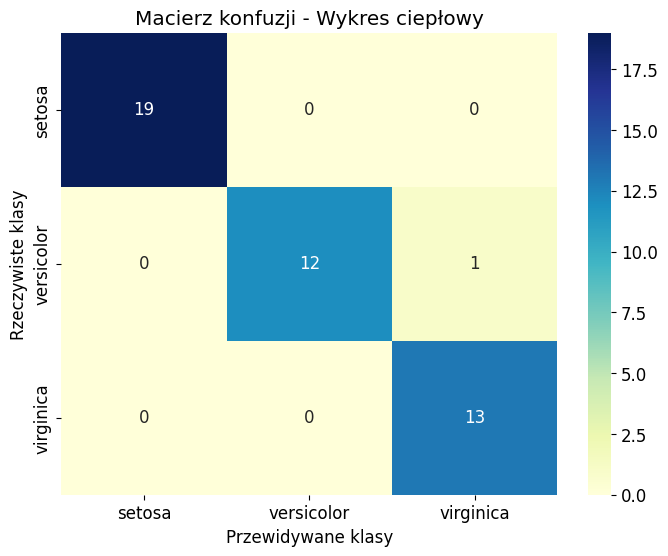

In [55]:
# Importujemy metodę confusion_matrix
from sklearn.metrics import confusion_matrix

# Nazwy klas (typy kwiatów w zbiorze Iris)
class_names = iris.target_names

# Tworzymy macierz konfuzji
cm = confusion_matrix(y_test, y_pred)

# Tworzymy DataFrame dla lepszej czytelności
cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

# Rysujemy wykres ciepłowy (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title("Macierz konfuzji - Wykres ciepłowy")
plt.xlabel("Przewidywane klasy")
plt.ylabel("Rzeczywiste klasy")
plt.show()


# Analiza prawdopodobieństw klasyfikacji za pomocą metody `predict_proba`

Metoda `predict_proba` na modelu klasyfikatora pozwala obliczyć prawdopodobieństwo przypisania danej próbki do każdej z dostępnych klas. Dzięki temu możemy zobaczyć, jak pewny był model swoich przewidywań.

#### Interpretacja danych:

1. Każda próbka ma przypisane prawdopodobieństwo przynależności do każdej klasy.
2. Wysokie prawdopodobieństwo (bliskie 1) dla jednej klasy i niskie dla innych wskazuje na wysoką pewność modelu.
3. Jeśli różnice między prawdopodobieństwami są niewielkie, oznacza to, że model nie był pewien przypisania próbki do danej klasy.

Poniżej analizujemy prawdopodobieństwa dla pierwszych 10 próbek z danych testowych. Wyświetlamy wyniki w formie tabeli (DataFrame), aby były łatwe do odczytania.


In [56]:
# Obliczamy prawdopodobieństwa dla pierwszych 10 próbek z danych testowych
y_pred_prob = gnb.predict_proba(X_test)[0:10]

# Sortujemy etykiety klas, aby przypisać je do kolumn w DataFrame
class_labels = sorted(gnb.classes)

# Tworzymy DataFrame dla wyników
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=class_labels)

# Wyświetlamy prawdopodobieństwa
print("Prawdopodobieństwa klasyfikacji dla pierwszych 10 próbek:")
y_pred_prob_df

Prawdopodobieństwa klasyfikacji dla pierwszych 10 próbek:


,setosa,versicolor,virginica
0,4.158701e-88,9.955278e-01,4.472165e-03
1,1.000000e+00,1.310311e-13,2.217720e-20
2,9.830853e-285,2.701383e-12,1.000000e+00
3,9.547171e-92,9.748614e-01,2.513857e-02
4,1.086763e-103,8.319107e-01,1.680893e-01
5,1.000000e+00,6.776933e-13,7.148908e-21
6,2.799808e-51,9.999639e-01,3.607492e-05
7,3.471082e-172,4.260991e-07,9.999996e-01
8,8.873981e-94,9.935781e-01,6.421885e-03
9,1.015240e-57,9.999529e-01,4.711523e-05


# Wizualizacja prawdopodobieństw z metody `predict_proba`

Ostateczna analiza polega na wizualizacji rozkładu przewidzianych prawdopodobieństw dla każdej klasy. W tym celu tworzymy histogramy, które pokazują, jak model rozkłada prawdopodobieństwa między klasami.

#### Proces:

1. **Tworzenie macierzy prawdopodobieństw**: Wyodrębniamy kolumny z wynikami `predict_proba`, gdzie każda kolumna odpowiada jednej klasie.
2. **Histogram**: Dla każdej klasy rysujemy histogram, który pokazuje liczbę próbek przypisanych z różnym prawdopodobieństwem.

#### Interpretacja wykresu:

- Rozkład bliski wartościom 0 i 1 oznacza, że model jest bardzo pewny swoich decyzji.
- Rozkład w pobliżu wartości środkowych (np. 0.5) sugeruje, że model miał trudności z przypisaniem próbki do konkretnej klasy.

Wynikowy histogram wizualizuje, że model był pewny swoich decyzji w większości przypadków.


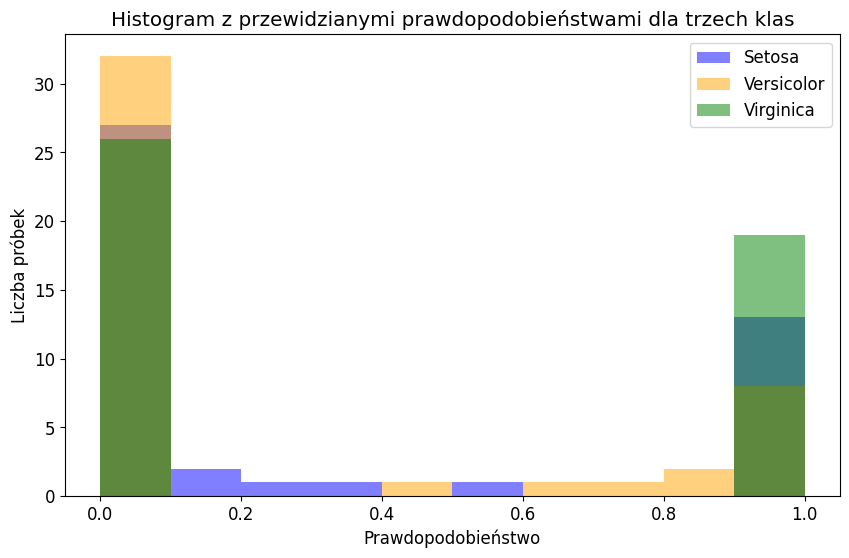

In [57]:
import numpy as np

# Tworzymy macierz prawdopodobieństw dla danych testowych
proba_matrix = np.array([list(probs.values()) for probs in gnb.predict_proba(X_test)])

# Oddzielamy prawdopodobieństwa dla każdej klasy
y_pred_setosa = proba_matrix[:, 0]
y_pred_versicolor = proba_matrix[:, 1]
y_pred_virginica = proba_matrix[:, 2]

# Ustawiamy wielkość czcionki na wykresie
plt.rcParams['font.size'] = 12

# Tworzymy wykres z określonym rozmiarem
plt.figure(figsize=(10, 6))

# Rysujemy histogram dla każdej klasy
plt.hist(y_pred_setosa, bins=10, alpha=0.5, label='Setosa', color='blue')
plt.hist(y_pred_versicolor, bins=10, alpha=0.5, label='Versicolor', color='orange')
plt.hist(y_pred_virginica, bins=10, alpha=0.5, label='Virginica', color='green')

# Dodajemy tytuł i etykiety osi
plt.title('Histogram z przewidzianymi prawdopodobieństwami dla trzech klas')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Liczba próbek')

# Wyświetlamy legendę
plt.legend()

# Pokazujemy wykres
plt.show()

# Podsumowanie

W projekcie wykorzystaliśmy zbiór danych IRIS, zawierający informacje o trzech gatunkach irysów. Proces można podzielić na kilka kluczowych etapów:

1. **Przygotowanie danych**:

   - Przekształciliśmy dane, aby były kompatybilne z modelem.
   - Podzieliliśmy zbiór danych na część treningową i testową.

2. **Uczenie modelu**:

   - Zastosowaliśmy Gaussowski Naiwny Klasyfikator Bayesowski, aby nauczyć model na danych treningowych za pomocą metody `fit`.

3. **Przewidywania**:

   - Użyliśmy metody `predict`, aby przetestować model na danych testowych i uzyskać przewidywania dla próbek.

4. **Ewaluacja modelu**:
   - Dokonaliśmy analizy wyników, w tym:
     - Obliczenia dokładności i precyzji.
     - Wykorzystania macierzy konfuzji oraz metody `predict_proba` do lepszej wizualizacji wyników.
   - Sprawdziliśmy, czy model nie wykazuje oznak przeuczenia (overfittingu) lub niedouczenia (underfittingu).

### Wnioski:

- Model osiągnął wysoką precyzję, a przewidywania były zgodne z rzeczywistymi wynikami.
- Brak istotnych różnic między dokładnością na danych treningowych i testowych wskazuje na dobrą jakość generalizacji modelu.
- Wizualizacje, takie jak histogramy prawdopodobieństw oraz macierz konfuzji, potwierdzają, że model działa prawidłowo i z dużą pewnością przypisuje próbki do odpowiednich klas.

### Podsumowanie:

Na podstawie przeprowadzonej analizy można stwierdzić, że model Gaussowskiego Naiwnego Klasyfikatora Bayesowskiego jest godnym zaufania narzędziem do przewidywań statystycznych w przypadku tego zbioru danych. Jego wysoka dokładność i stabilność czynią go skutecznym rozwiązaniem w zadaniach klasyfikacyjnych.
